# Phân loại khách hàng theo mô hình RFM

## 1. Giới thiệu

### 1.1. Khái niệm

RFM là mô hình phân chia khách hàng theo các nhóm đồng nhất giúp hiểu đặc điểm của từng nhóm và thu hút họ bằng các chiến dịch có lkieen quan thay vì phân khúc theo độ tuổi hoặc địa lý của khách hàng.
Trong đó các chỉ số:
- R(recency): Lần mua hàng gần nhất
- F(Frequency): Tần suất mua hàng của khách hàng
- M(Monetary Value): - Tiền, giá trị, khách hàng chi tiêu


Mặc dù có vô số cách để thực hiện phân đoạn, phân tích RFM phổ biến vì ba lý do:
Sử dụng các thang đo khách quan – mang lại sự mô tả cao cấp và ngắn gọn về khách hàng.
Đơn giản – các nhà quản trị có thể sử dụng nó một cách hiệu quả mà không cần các nhà phân tích dữ liệu hoặc phần mềm tinh vi.
Trực quan – đầu ra của phương pháp phân khúc này là dễ hiểu và giải thích.

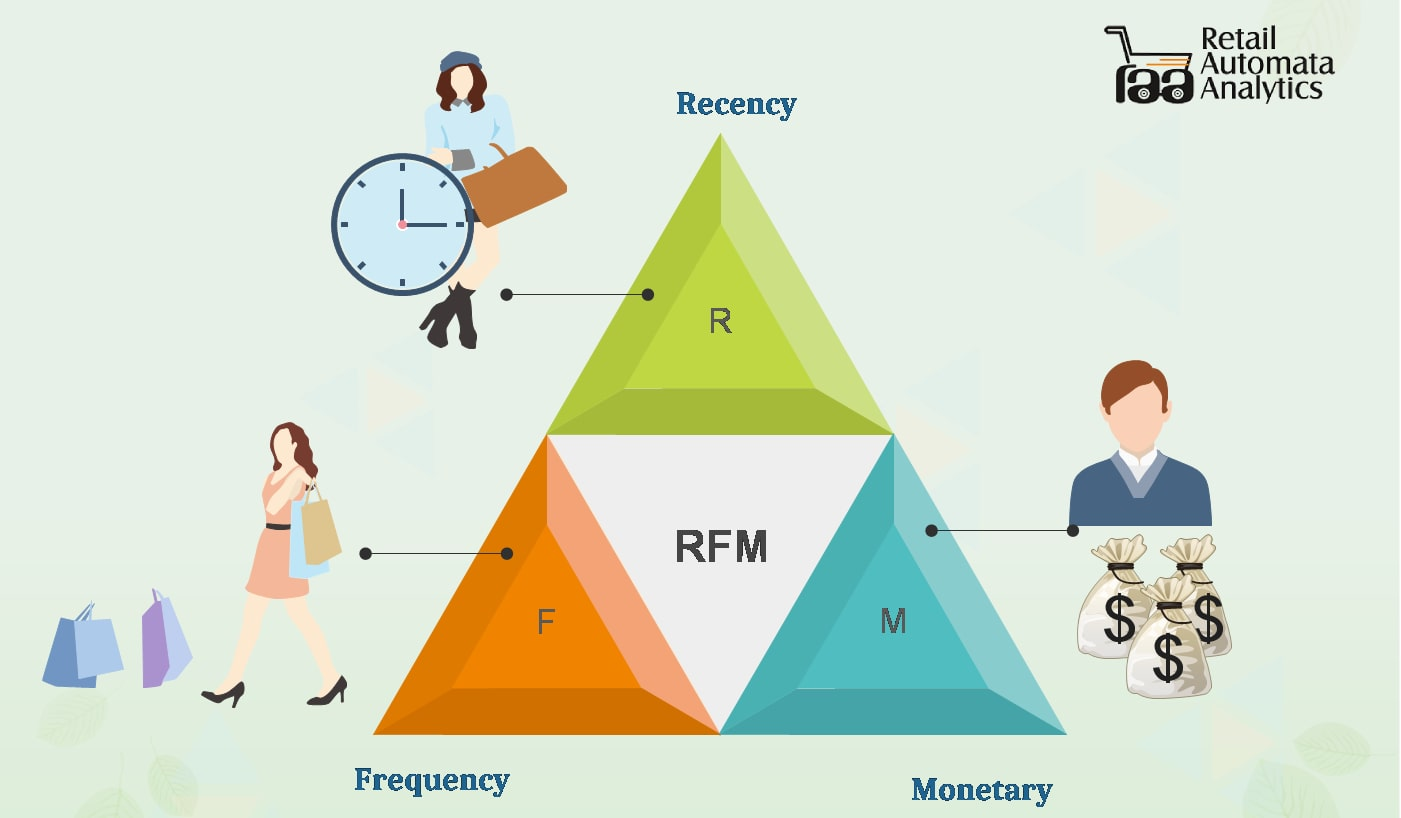

### 1.2. Lợi ích của sử dụng mô hình RFM vào phân tích dữ liệu

1. Hiểu khách hàng của bạn
2. Tăng doanh số
3. không mất khách hàng, tập trung đúng tệp khách hàng
4. Phân loại khách hàng theo mô hình 80/20 mang lại hiệu quả cao

## 2. Nguồn dữ liệu

Với nguồn dữ liệu bán hàng lấy từ diễn đàn Kaggle (https://www.kaggle.com/code/aryaatak/customer-segmentation-with-rfm/data)
Mô tả:
- Với hơn 1 triệu bản ghi được ghi chép lại
- Số liệu thống kê từ năm 2009-2011

## 3. Mục tiêu phân tích

### 3.1 Nội dung phân tích

 - 1, Đánh giá và làm sạch dữ liệu
 - 2, Đưa ra phân loại theo R (Recency) lần mua hàng gần nhất của khách hàng
 - 3, Đưa ra phân loại theo F(Frenquency) tần suất mua hàng của khách hàng
 - 4, Đưa ra phân loại theo M (Monetary Value) số tiền chi tiêu của khách hàng
 - 5, Mối quan hệ giữa R-F-M
 - 6, Tạo lập chỉ số RFM
 - 7, Đánh giá tình hình bán hàng
         - 7.1 Ưu điểm tình hình công ty
         - 7.2 Nhược điểm tình hình công ty

 ### 3.2 Các kỹ năng phân tích dữ liệu được sử dụng

- Làm sạch dữ liệu
- Nhóm các bảng để phân tích chuyên sâu
- Xử lý dữ liệu với kiểu timeseries
- Trực quan hóa dữ liệu

### 3.3 Các FameWorks và thư viện sử dụng

- Python
- Pandas
- Numpy
- Seaborn
- Matplotlib

### 3.4 Giải thích một số thuật ngữ: 
- Particular attention: đặc biệt chú ý
- Retail: bán lẻ
- Formular: công thức
- Attribute: Thuộc tính
- Derived: Nguồn gốc
- Segment: Bộ phận

## Bắt đầu phân tích

## 1. Đánh giá và làm sạch dữ liệu

In [2]:
# Thiết lập môi trường làm việc
import pandas as pd
import numpy as np
import seaborn as sns
import datetime as dt
import matplotlib.pyplot as plt

In [3]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [6]:
# Import dữ liệu
df = pd.read_csv('online_retail_listing.csv',delimiter=';',encoding="latin-1")

In [7]:
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,1.12.2009 07:45,"6,95",13085.00,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,1.12.2009 07:45,"6,75",13085.00,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,1.12.2009 07:45,"6,75",13085.00,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,1.12.2009 07:45,"2,1",13085.00,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,1.12.2009 07:45,"1,25",13085.00,United Kingdom


In [8]:
# kích thước dữ liệu
df.shape

(1048575, 8)

In [10]:
# Loại dữ liệu
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   Invoice      1048575 non-null  object 
 1   StockCode    1048575 non-null  object 
 2   Description  1044203 non-null  object 
 3   Quantity     1048575 non-null  int64  
 4   InvoiceDate  1048575 non-null  object 
 5   Price        1048575 non-null  object 
 6   Customer ID  811893 non-null   float64
 7   Country      1048575 non-null  object 
dtypes: float64(1), int64(1), object(6)
memory usage: 64.0+ MB


In [11]:
# Có bao nhiêu sản phẩm được bày bán?
df["Description"].nunique()

5697

In [13]:
# Những mặt hàng được xuất hiện nhiều nhất?
df["Description"].value_counts().head()

WHITE HANGING HEART T-LIGHT HOLDER    5875
REGENCY CAKESTAND 3 TIER              4364
JUMBO BAG RED RETROSPOT               3426
ASSORTED COLOUR BIRD ORNAMENT         2928
PARTY BUNTING                         2746
Name: Description, dtype: int64

In [15]:
# Nhóm các loại mặt hàng theo số lượng bán ra?
df.groupby ("Description").agg ({"Quantity":"sum"}).head()

,Quantity
Description,
DOORMAT UNION JACK GUNS AND ROSES,179
3 STRIPEY MICE FELTCRAFT,690
4 PURPLE FLOCK DINNER CANDLES,302
50'S CHRISTMAS GIFT BAG LARGE,1875
ANIMAL STICKERS,385


In [29]:
# Tổng số hóa đơn đã xuất?
df["Invoice"].nunique()

52961

In [16]:
# Số tiền đã thanh toán trên mỗi hóa đơn
# Sử dụng hàm lambda để giải quyết bài toán này
df["Price"] = df["Price"].apply (lambda x: float(str(x.replace(',','.'))))

In [21]:
# Tổng số tiền trên mỗi hóa đơn bằng số lượng nhân cho giá tiền
df['TotalPrice'] = df["Quantity"]*df["Price"]

In [20]:
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,TotalPrice
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,1.12.2009 07:45,6.95,13085.00,United Kingdom,83.40
1,489434,79323P,PINK CHERRY LIGHTS,12,1.12.2009 07:45,6.75,13085.00,United Kingdom,81.00
2,489434,79323W,WHITE CHERRY LIGHTS,12,1.12.2009 07:45,6.75,13085.00,United Kingdom,81.00
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,1.12.2009 07:45,2.10,13085.00,United Kingdom,100.80
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,1.12.2009 07:45,1.25,13085.00,United Kingdom,30.00


In [22]:
df.groupby("Invoice").agg ({"TotalPrice":"sum"}).head()

,TotalPrice
Invoice,
489434,505.30
489435,145.80
489436,630.33
489437,310.75
489438,2286.24


In [23]:
# Sản phẩm nào có giá đắt nhất?
df.groupby("Description").agg({"Price":"max"}).sort_values("Price", ascending = False).head()

,Price
Description,
Manual,38970.00
Bank Charges,18910.69
AMAZON FEE,16888.02
Adjust bad debt,11062.06
POSTAGE,8142.75


In [24]:
# Gom sản phẩm theo quốc gia
df["Country"].value_counts().head()

United Kingdom    963819
EIRE               17581
Germany            17327
France             14100
Netherlands         5054
Name: Country, dtype: int64

In [25]:
# Mặt hàng bị trả hàng nhiều nhất sau khi bán là gì?
returned = df[df["Invoice"].str.contains("C",na = False)]

In [26]:
returned

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,TotalPrice
178,C489449,22087,PAPER BUNTING WHITE LACE,-12,1.12.2009 10:33,2.95,16321.00,Australia,-35.40
179,C489449,85206A,CREAM FELT EASTER EGG BASKET,-6,1.12.2009 10:33,1.65,16321.00,Australia,-9.90
180,C489449,21895,POTTING SHED SOW 'N' GROW SET,-4,1.12.2009 10:33,4.25,16321.00,Australia,-17.00
181,C489449,21896,POTTING SHED TWINE,-6,1.12.2009 10:33,2.10,16321.00,Australia,-12.60
182,C489449,22083,PAPER CHAIN KIT RETRO SPOT,-12,1.12.2009 10:33,2.95,16321.00,Australia,-35.40
...,...,...,...,...,...,...,...,...,...
1046566,C580313,22649,STRAWBERRY FAIRY CAKE TEAPOT,-3,2.12.2011 15:10,4.95,12668.00,Germany,-14.85
1046567,C580313,22419,LIPSTICK PEN RED,-6,2.12.2011 15:10,0.42,12668.00,Germany,-2.52
1046568,C580313,22303,COFFEE MUG APPLES DESIGN,-2,2.12.2011 15:10,2.55,12668.00,Germany,-5.10
1046569,C580313,21232,STRAWBERRY CERAMIC TRINKET POT,-3,2.12.2011 15:10,1.25,12668.00,Germany,-3.75


In [27]:
returned.sort_values("Quantity", ascending = True).head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,TotalPrice
587085,C541433,23166,MEDIUM CERAMIC TOP STORAGE JAR,-74215,18.01.2011 10:17,1.04,12346.00,United Kingdom,-77183.60
529729,C536757,84347,ROTATING SILVER ANGELS T-LIGHT HLDR,-9360,2.12.2010 14:23,0.03,15838.00,United Kingdom,-280.80
507225,C536757,84347,ROTATING SILVER ANGELS T-LIGHT HLDR,-9360,2.12.2010 14:23,0.03,15838.00,United Kingdom,-280.80
359669,C524235,21088,SET/6 FRUIT SALAD PAPER CUPS,-7128,28.09.2010 11:02,0.08,14277.00,France,-570.24
359670,C524235,21096,SET/6 FRUIT SALAD PAPER PLATES,-7008,28.09.2010 11:02,0.13,14277.00,France,-911.04


In [29]:
# Kiểm tra giá trị rỗng
df.isnull().sum()

Invoice             0
StockCode           0
Description      4372
Quantity            0
InvoiceDate         0
Price               0
Customer ID    236682
Country             0
TotalPrice          0
dtype: int64

In [30]:
df.dropna(inplace = True)
df.isnull().sum()

Invoice        0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
Price          0
Customer ID    0
Country        0
TotalPrice     0
dtype: int64

# 3. Đưa ra phân loại theo R (Recency) lần mua hàng gần nhất của khách hàng

In [47]:
df =df [~df["Invoice"].str.contains("C", na = False)]

In [48]:
df
# (đã xóa những hóa đơn hoàn trả)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,TotalPrice
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-01-12 07:45:00,6.95,13085.00,United Kingdom,83.40
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-01-12 07:45:00,6.75,13085.00,United Kingdom,81.00
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-01-12 07:45:00,6.75,13085.00,United Kingdom,81.00
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-01-12 07:45:00,2.10,13085.00,United Kingdom,100.80
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-01-12 07:45:00,1.25,13085.00,United Kingdom,30.00
...,...,...,...,...,...,...,...,...,...
1048570,580501,23284,DOORMAT KEEP CALM AND COME IN,2,2011-04-12 13:00:00,8.25,14546.00,United Kingdom,16.50
1048571,580501,22507,MEMO BOARD RETROSPOT DESIGN,3,2011-04-12 13:00:00,4.95,14546.00,United Kingdom,14.85
1048572,580502,22469,HEART OF WICKER SMALL,3,2011-04-12 13:15:00,1.65,16931.00,United Kingdom,4.95
1048573,580502,23489,VINTAGE BELLS GARLAND,2,2011-04-12 13:15:00,2.89,16931.00,United Kingdom,5.78


In [49]:
# Thời điểm bắt đầu thống kê và thời điểm kết thúc thống kê
print("Min Date", df["InvoiceDate"].min(), "Max Date", df["InvoiceDate"].max())

Min Date 2009-01-12 07:45:00 Max Date 2011-12-10 17:19:00


In [50]:
# chuyển về dạng Timeseries
df["InvoiceDate"] = pd.to_datetime(df["InvoiceDate"])

In [51]:
# Khoảng cách giữa thời điểm kết thúc thống kê và ngày mua hàng cuối cùng theo từng mã khách hàng chính là giá trị R cần tìm
# hàm groupby và agg được sử dụng
recency = (dt.datetime(2012, 1, 1) - df.groupby("Customer ID").agg({"InvoiceDate":"max"})).rename(columns = {"InvoiceDate":"Recency"})
recency

,Recency
Customer ID,
12346.00,347 days 13:59:00
12347.00,61 days 11:35:00
12348.00,97 days 10:47:00
12349.00,40 days 14:09:00
12350.00,332 days 07:59:00
...,...
18283.00,31 days 11:01:00
18284.00,630 days 12:27:00
18285.00,682 days 13:36:00


In [52]:
# Chuyển về dạng ngày
recency["Recency"] = recency["Recency"].apply(lambda x: x.days)

In [53]:
recency

,Recency
Customer ID,
12346.00,347
12347.00,61
12348.00,97
12349.00,40
12350.00,332
...,...
18283.00,31
18284.00,630
18285.00,682


  ## 3.Đưa ra phân loại theo F(Frenquency) tần suất mua hàng của khách hàng

In [43]:
# Số lần mua hàng, hay được tính bằng số lần xuất hóa đơn được tính cho mỗi khách hàng chính là giá trị F cần tìm
freq = df.groupby("Customer ID") .agg({"InvoiceDate":"nunique"}).rename(columns ={"InvoiceDate":"Frequency"})
freq

,Frequency
Customer ID,
12346.00,12
12347.00,7
12348.00,5
12349.00,4
12350.00,1
...,...
18283.00,21
18284.00,1
18285.00,1


## 4. Đưa ra phân loại theo M (Monetary Value) số tiền chi tiêu của khách hàngM - Montetary

In [55]:
montetary = df.groupby ("Customer ID").agg({"TotalPrice":"sum"}).rename(columns={"TotalPrice":"Montetary"})

In [56]:
montetary

,Montetary
Customer ID,
12346.00,77556.46
12347.00,5408.50
12348.00,2019.40
12349.00,4428.69
12350.00,334.40
...,...
18283.00,2528.65
18284.00,461.68
18285.00,427.00


## 5. Mối quan hệ giữa R-F-M

In [58]:
rfm = pd.concat([recency, freq, montetary],  axis=1)
rfm.head()

,Recency,Frequency,Montetary
Customer ID,,,
12346.00,347,12,77556.46
12347.00,61,7,5408.50
12348.00,97,5,2019.40
12349.00,40,4,4428.69
12350.00,332,1,334.40


In [59]:
rfm

,Recency,Frequency,Montetary
Customer ID,,,
12346.00,347,12,77556.46
12347.00,61,7,5408.50
12348.00,97,5,2019.40
12349.00,40,4,4428.69
12350.00,332,1,334.40
...,...,...,...
18283.00,31,21,2528.65
18284.00,630,1,461.68
18285.00,682,1,427.00


C:\Users\dell\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


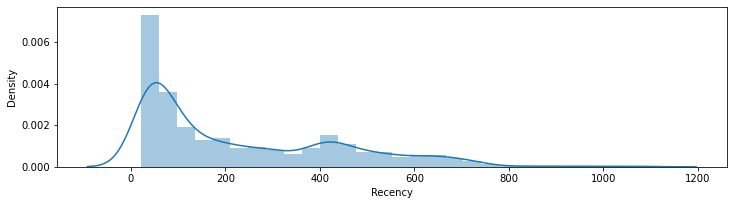

In [60]:
plt.figure(figsize=(12,10));
plt.subplot(3, 1, 1); sns.distplot(rfm['Recency']);

C:\Users\dell\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


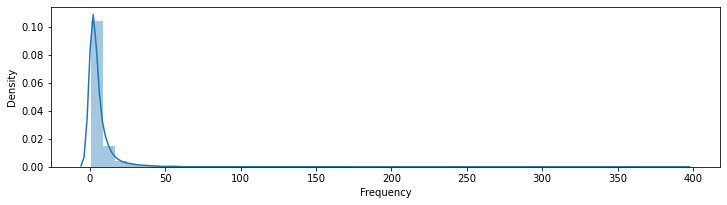

In [61]:
plt.figure(figsize=(12,10))
plt.subplot(3, 1, 2); sns.distplot(rfm['Frequency']);
plt.show()

In [62]:
rfm

,Recency,Frequency,Montetary
Customer ID,,,
12346.00,347,12,77556.46
12347.00,61,7,5408.50
12348.00,97,5,2019.40
12349.00,40,4,4428.69
12350.00,332,1,334.40
...,...,...,...
18283.00,31,21,2528.65
18284.00,630,1,461.68
18285.00,682,1,427.00


## 6. Tạo lập chỉ số RFM

In [63]:
rfm["RecencyScore"]= pd.qcut(rfm["Recency"], 5, labels = [5, 4, 3, 2, 1])
rfm["FrequencyScore"]= pd.qcut(rfm["Frequency"].rank(method = "first"), 5, labels = [1,2,3,4,5])
rfm["MonteraryScore"]= pd.qcut(rfm["Montetary"], 5, labels = [1,2,3,4,5])

In [64]:
rfm.head()

,Recency,Frequency,Montetary,RecencyScore,FrequencyScore,MonteraryScore
Customer ID,,,,,,
12346.00,347,12,77556.46,2,5,5
12347.00,61,7,5408.50,4,4,5
12348.00,97,5,2019.40,3,4,4
12349.00,40,4,4428.69,5,3,5
12350.00,332,1,334.40,2,1,2


In [65]:
abc = rfm['RecencyScore'].astype(str)

In [66]:
# RFM Scores: Category
rfm["RFM_SCORE"] = (rfm['RecencyScore'].astype(str) + 
                    rfm['FrequencyScore'].astype(str) + 
                    rfm['MonteraryScore'].astype(str))
rfm.head()

,Recency,Frequency,Montetary,RecencyScore,FrequencyScore,MonteraryScore,RFM_SCORE
Customer ID,,,,,,,
12346.00,347,12,77556.46,2,5,5,255
12347.00,61,7,5408.50,4,4,5,445
12348.00,97,5,2019.40,3,4,4,344
12349.00,40,4,4428.69,5,3,5,535
12350.00,332,1,334.40,2,1,2,212


In [68]:
# Phân loại khách hàng theo chỉ số RFM
seg_map = {
    r'[1-2][1-2]': 'Hibernating',
    r'[1-2][3-4]': 'At Risk',
    r'[1-2]5': 'Can\'t Loose',
    r'3[1-2]': 'About to Sleep',
    r'33': 'Need Attention',
    r'[3-4][4-5]': 'Loyal Customers',
    r'41': 'Promising',
    r'51': 'New Customers',
    r'[4-5][2-3]': 'Potential Loyalists',
    r'5[4-5]': 'Champions'
}

rfm['Segment'] = rfm['RecencyScore'].astype(str) + rfm['FrequencyScore'].astype(str)
rfm['Segment'] = rfm['Segment'].replace(seg_map, regex=True)
rfm

,Recency,Frequency,Montetary,RecencyScore,FrequencyScore,MonteraryScore,RFM_SCORE,Segment
Customer ID,,,,,,,,
12346.00,347,12,77556.46,2,5,5,255,Can't Loose
12347.00,61,7,5408.50,4,4,5,445,Loyal Customers
12348.00,97,5,2019.40,3,4,4,344,Loyal Customers
12349.00,40,4,4428.69,5,3,5,535,Potential Loyalists
12350.00,332,1,334.40,2,1,2,212,Hibernating
...,...,...,...,...,...,...,...,...
18283.00,31,21,2528.65,5,5,4,554,Champions
18284.00,630,1,461.68,1,2,2,122,Hibernating
18285.00,682,1,427.00,1,2,2,122,Hibernating


In [70]:
# Thống kê loại khách hàng
rfm['Segment'].value_counts()

Hibernating            1511
Loyal Customers        1139
Champions               852
At Risk                 754
Potential Loyalists     687
About to Sleep          401
Need Attention          268
Promising               120
Can't Loose              75
New Customers            56
Name: Segment, dtype: int64

#### Chú thích: 
- Hibernating :           Khách hàng lạ, ít mua hàng, ít chi tiêu
- Loyal Customers    :      Khách hàng thân thiết
- Champions    :            Khách hàng hoàn hảo
- At Risk      :            Khách hàng giàu có
- Potential Loyalists :     Khách hàng trung thành và nhiều tiềm năng
- About to Sleep     :      Khách hàng mua hàng thưa thớt và chi tiêu ít dần
- Need Attention     :      Khách hàng cần chú ý chăm sóc
- Promising       :         Khách hàng nhiều hứa hẹn
- Can't Loose    :          KHaacsh hàng cứng, trung thành
- New Customers     :       Khách hàng mới

## 7, Đánh giá tình hình bán hàng

Đánh giá và phân loại khách hàng theo mô hình RFM đã giúp chúng ta hiểu rõ về tình hình bán hàng của doanh nghiệp nêu trên. Vậy cụ thể là:

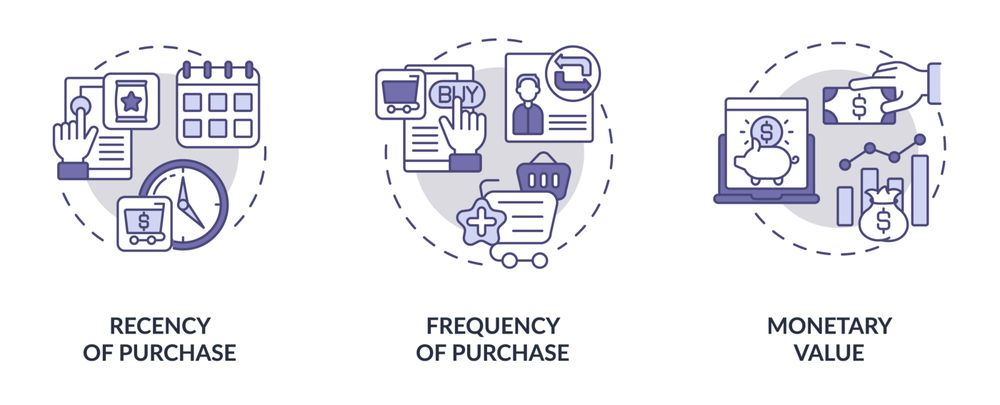

 ### 7.1. Ưu điểm tình hình bán hàng của công ty
Ưu điểm: 
- Đánh giá cao công ty vì số lượng khách hàng thân thiết rất cao chứng tỏ công ty có một lượng sản phẩm chất lượng, đáp ứng được nhu cầu thường xuyên của một tệp khách hàng.
- Khách hàng giàu có xếp thứ 3 chứng tỏ sản phẩm mang lại doanh thu lớn hơn cho công ty, cần chăm sóc tốt tệp khách hàng này vì họ rất tiềm năng

### 7.2 Nhược điểm tình hình bán hàng của công ty

 Nhược điểm: 
 - Khách hàng lạ, ít mua hàng chi tiêu còn rất nhiều chiếm đa số khách hàng, công ty cần chăm sóc tốt hơn, tung ra các đợt khuyến mãi hay cải tiến sản phẩm để lôi kéo khách hàng này trở về.
 - Khách hàng mới rất ít chứng tỏ sản phẩm chưa nổi bật chưa thu hút được tệp khách hàng có nhu cầu mới hoặc marketing sản phẩm chưa tốt chứng tỏ công ty bán hàng rất truyền thống